In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
from scipy import stats
from matplotlib import font_manager # Arial
import csv
plt.rcParams['font.sans-serif'] = 'Arial'

In [2]:
ap_fail_data = pd.read_csv('./ap.dat',header=None,encoding='utf-8',delimiter=" ",quoting=csv.QUOTE_NONE, skiprows=1)
print(ap_fail_data.shape)
ap_fail_data.head()

(712, 3)


,0,1,2
0,MEM,7.574219,1.678780e+09
1,MEM,33.550781,1.678780e+09
2,MEM,41.957031,1.678780e+09
3,MEM,41.957031,1.678780e+09
4,MEM,41.957031,1.678780e+09


In [2]:
bs_fail_data = pd.read_csv('./mprofile_bs.dat',header=None,encoding='utf-8',delimiter=" ",quoting=csv.QUOTE_NONE,skiprows=1)
print(bs_fail_data.shape)
bs_fail_data[1] = bs_fail_data[1]/1000
bs_fail_data.head()

(483, 3)


,0,1,2
0,MEM,0.000937,1.678774e+09
1,MEM,0.015340,1.678774e+09
2,MEM,0.032871,1.678774e+09
3,MEM,0.050918,1.678774e+09
4,MEM,0.069480,1.678774e+09


In [3]:
hd_fail_data = pd.read_csv('./mprofile_hd.dat',header=None,encoding='utf-8',delimiter=" ",quoting=csv.QUOTE_NONE, skiprows=1)
print(hd_fail_data.shape)
hd_fail_data[1] = hd_fail_data[1]/1000
hd_fail_data.head()

(570, 3)


,0,1,2
0,MEM,0.000004,1.678775e+09
1,MEM,0.016594,1.678775e+09
2,MEM,0.036961,1.678775e+09
3,MEM,0.057586,1.678775e+09
4,MEM,0.078469,1.678775e+09


[-100.    0.  100.  200.  300.  400.  500.  600.  700.  800.]


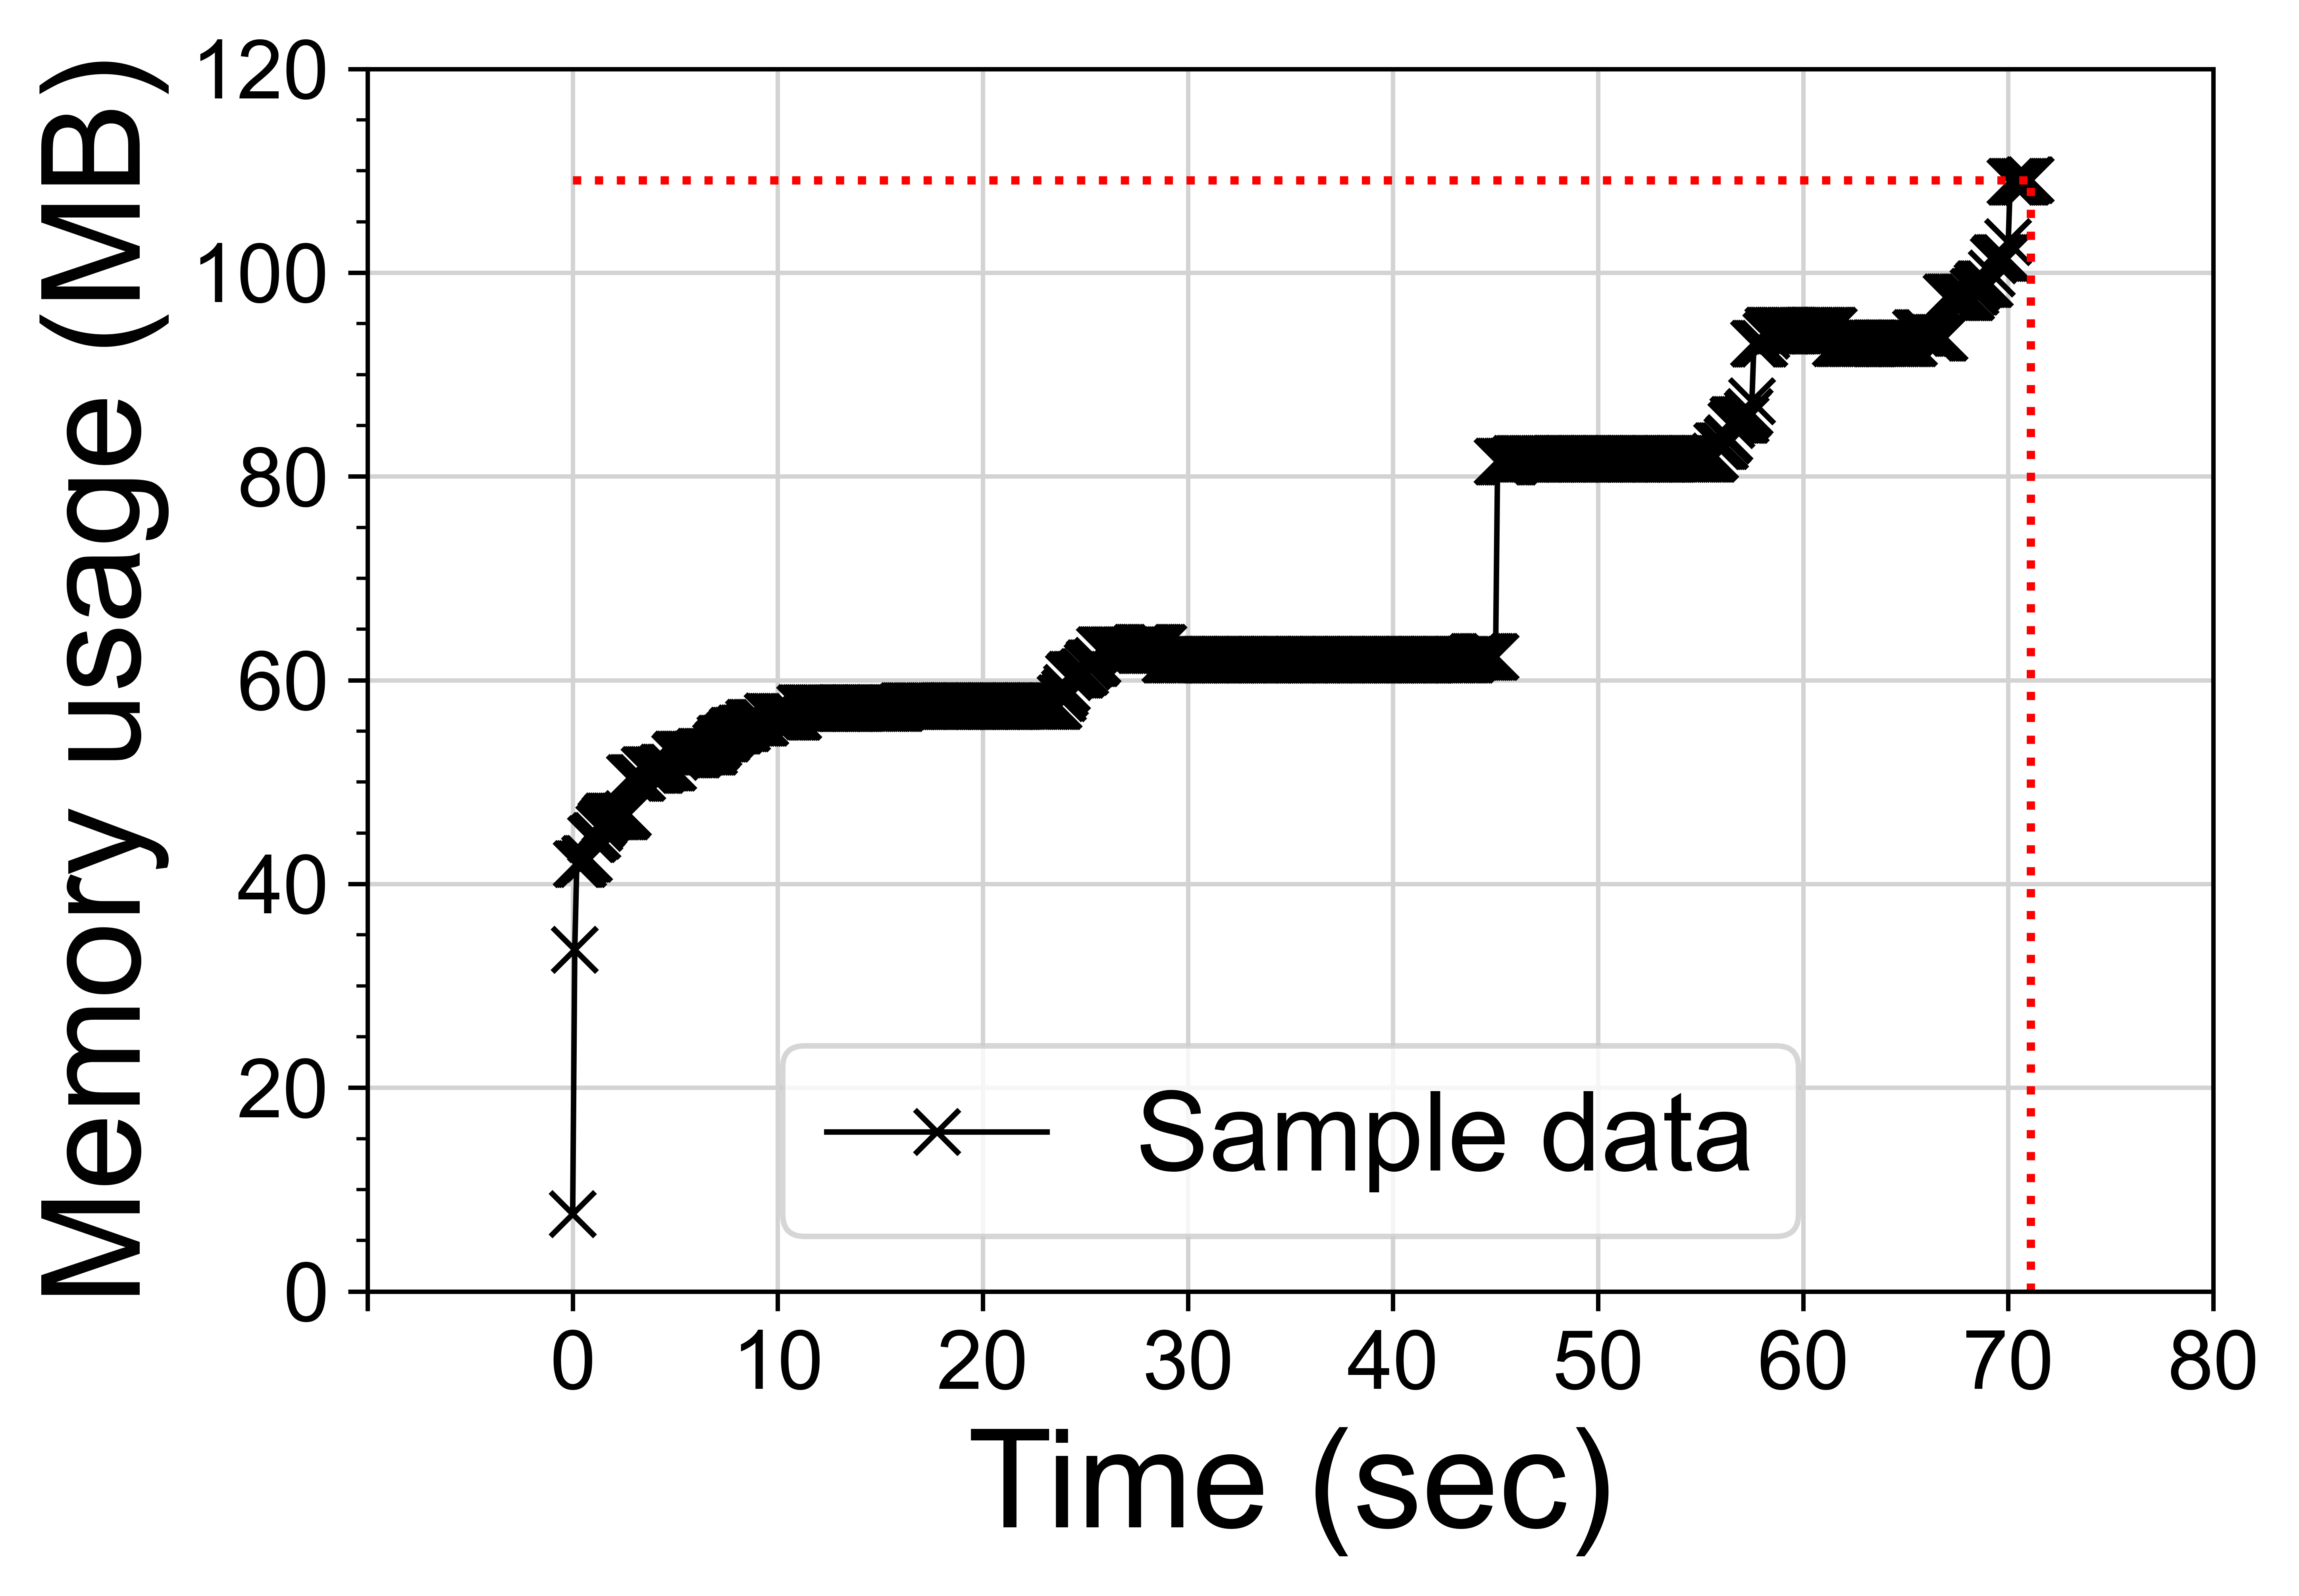

In [7]:
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=1000)
plt.rcParams['lines.markersize'] = 8
plt.plot(ap_fail_data[1], lw=1, marker='x', markeredgecolor='black', color='black', label='Sample data')

# 定义两个点的坐标
x1, y1 = 711, 0
x2, y2 = 711, ap_fail_data.iloc[711].at[1]

# 绘制直线
plt.plot([x1, x2], [y1, y2], color='r', ls='dotted')

# 定义两个点的坐标
x1, y1 = 0, ap_fail_data.iloc[711].at[1]
x2, y2 = 711, ap_fail_data.iloc[711].at[1]

# 绘制直线
plt.plot([x1, x2], [y1, y2], color='r', ls='dotted')


plt.legend(fontsize=20)

ax1.set_ylabel('Memory usage (MB)', fontsize=25)
ax1.set_xlabel('Time (sec)', fontsize=25)
# 获取当前的 x 轴刻度值列表
# plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
xticks = plt.xticks()[0]
print(xticks)
# 将每个刻度值除以 10
new_xticks = []
for i in xticks:
    if i < 0:
        new_xticks.append(None)
    else:
        new_xticks.append(int(i/10))

# 将新的刻度值设置为 x 轴刻度
ax1.set_xticks(xticks, new_xticks, fontsize=15)
plt.yticks(fontsize=15)
ax1.set_ylim([0, 120])
minor_locator = MultipleLocator(5) # 小刻度线间隔为0.1
ax1.yaxis.set_minor_locator(minor_locator) # 设置小刻度线的位置
ax1.grid(axis="both", linestyle='-', zorder=0, color='lightgrey')
plt.savefig('./ap_fail.pdf', bbox_inches = 'tight')

[-100.    0.  100.  200.  300.  400.  500.  600.]


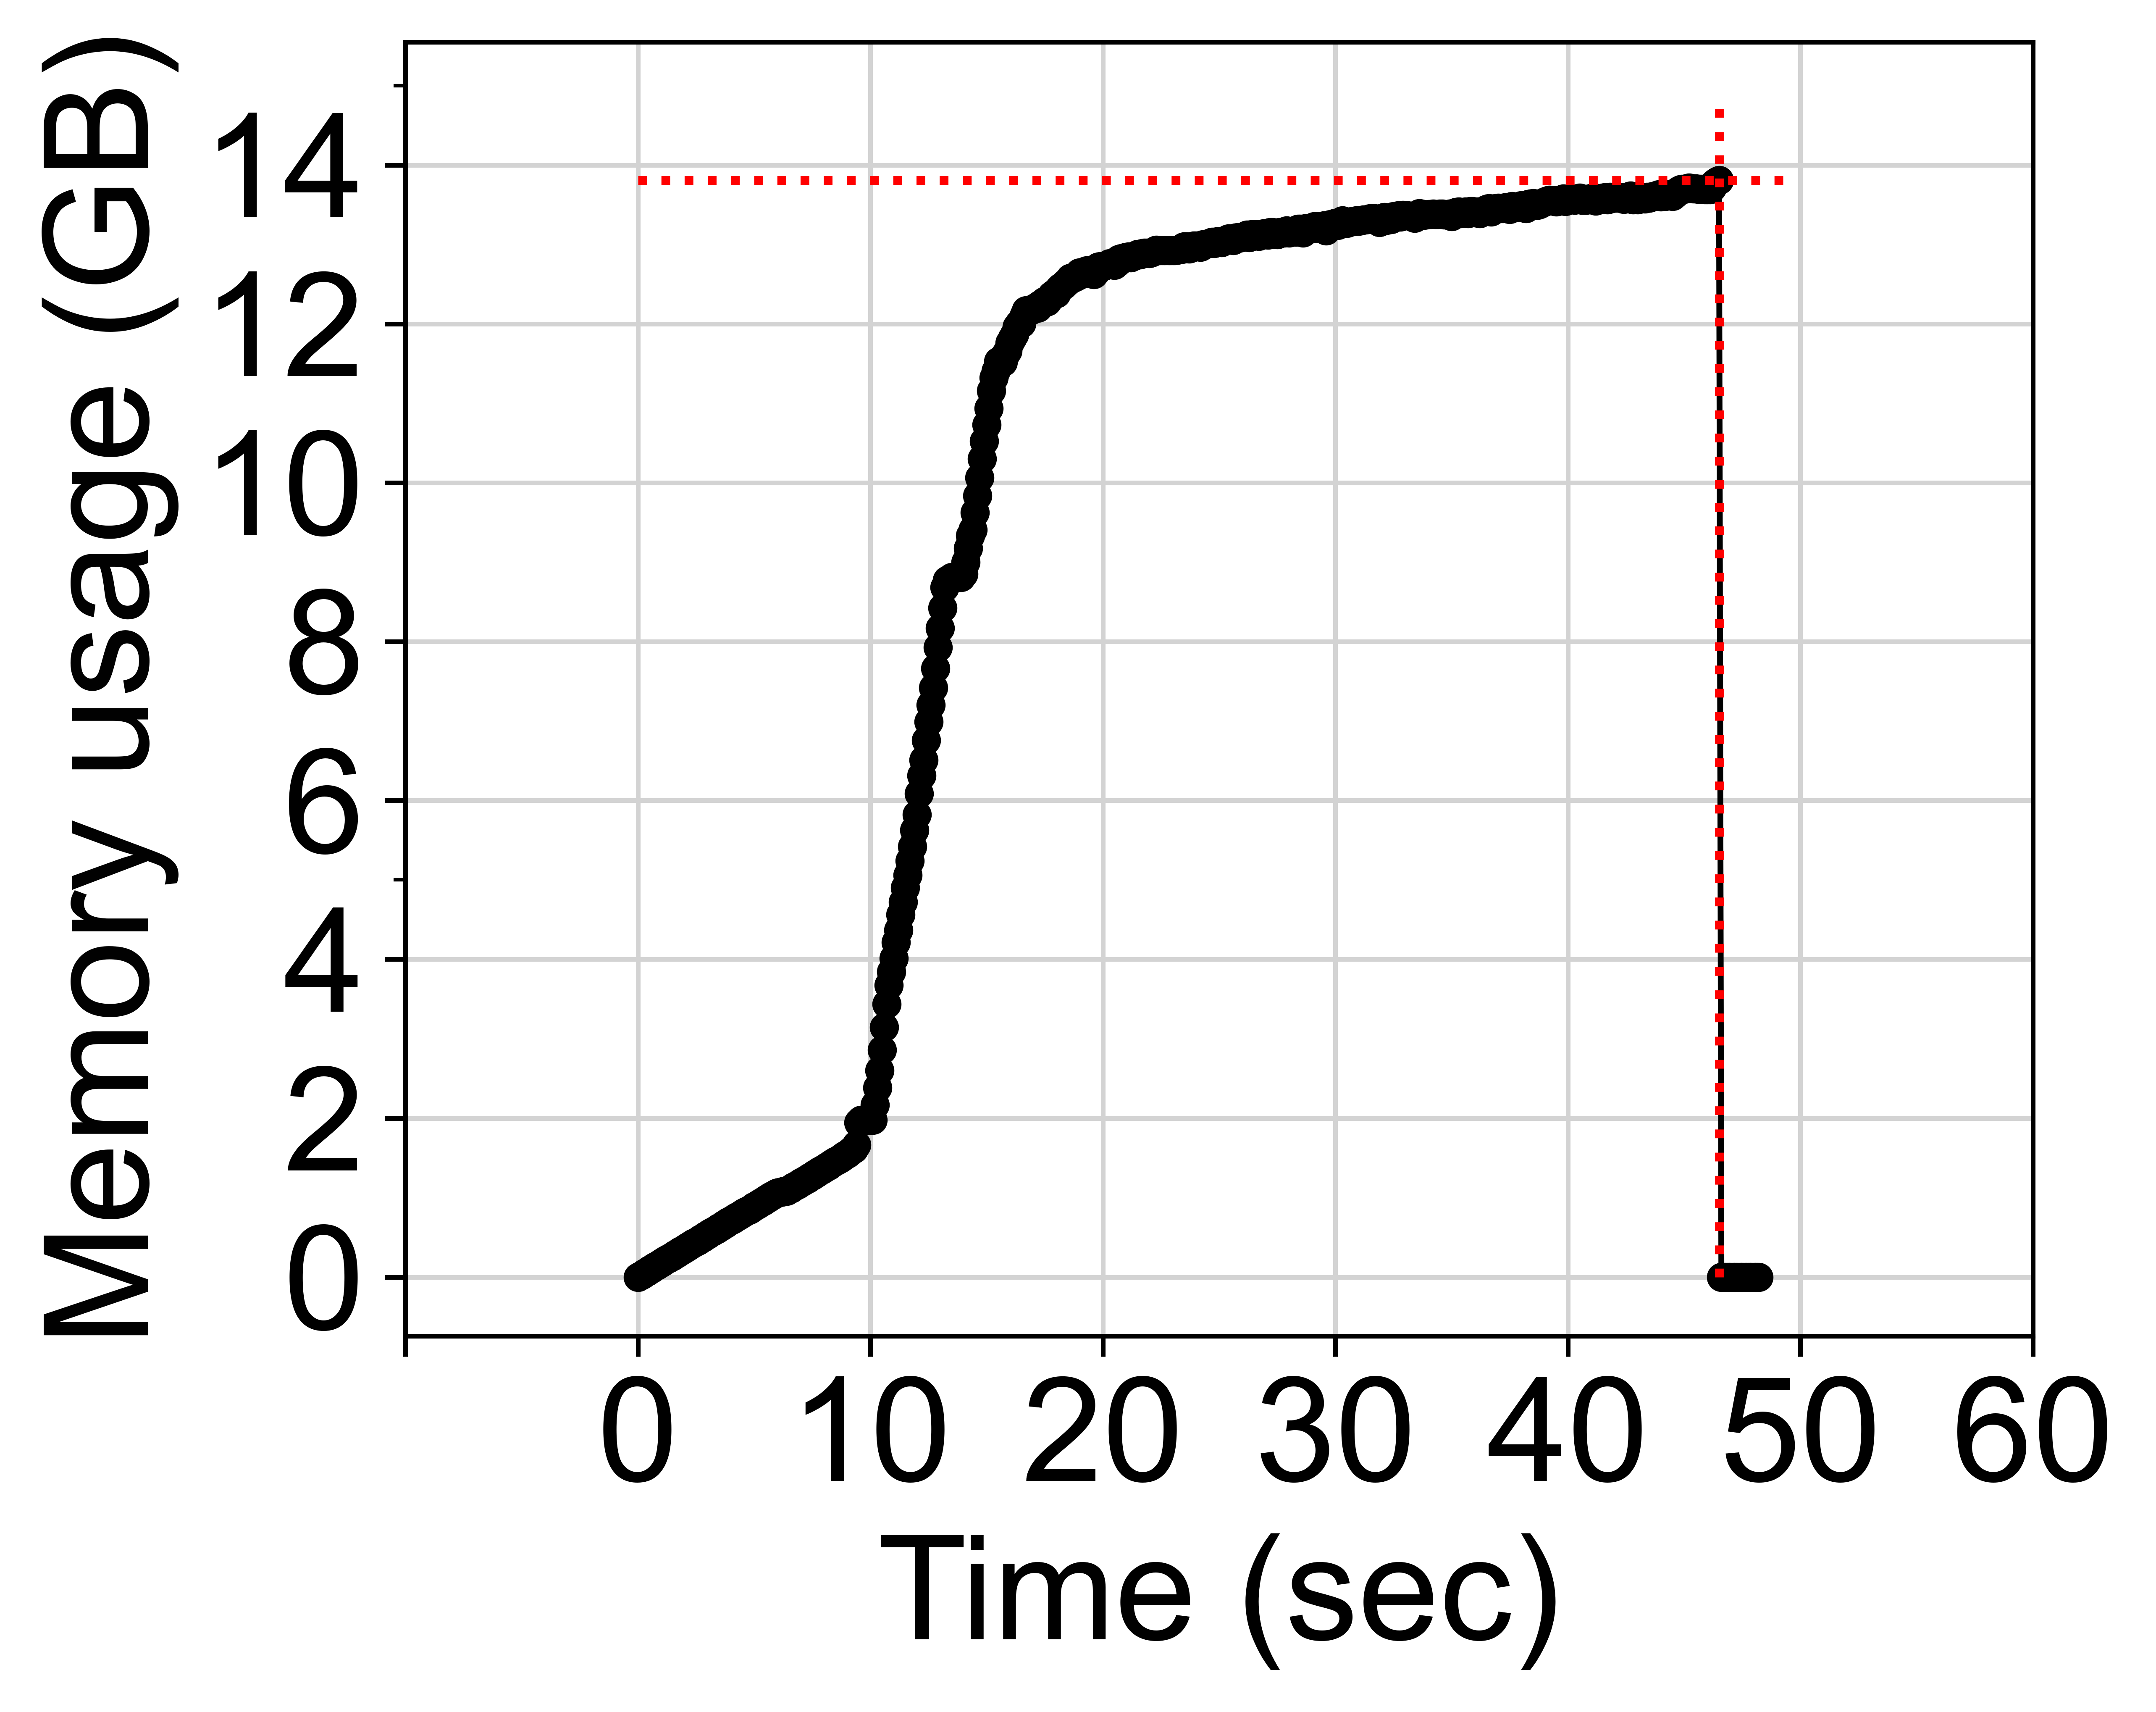

In [4]:
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
fig, ax1 = plt.subplots(figsize=(5, 4), dpi=1000)
plt.rcParams['lines.markersize'] = 4
plt.plot(bs_fail_data[1], lw=1, marker='o', markeredgecolor='black', color='black', label='Sample data')

max = 0
row = 0
for i in range(bs_fail_data.shape[0]):
    if bs_fail_data.iloc[i].at[1] > max:
        max = bs_fail_data.iloc[i].at[1]
        row = i
# 定义两个点的坐标
x1, y1 = row, 0
x2, y2 = row, (bs_fail_data.iloc[row].at[1] + 1)

# 绘制直线
plt.plot([x1, x2], [y1, y2], color='r', ls='dotted')

# 定义两个点的坐标
x1, y1 = 0, bs_fail_data.iloc[row].at[1]
x2, y2 = row + 30, bs_fail_data.iloc[row].at[1]

# 绘制直线
plt.plot([x1, x2], [y1, y2], color='r', ls='dotted')


# plt.legend(fontsize=25)

ax1.set_ylabel('Memory usage (GB)', fontsize=25)
ax1.set_xlabel('Time (sec)', fontsize=25)
# 获取当前的 x 轴刻度值列表
# plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
xticks = plt.xticks()[0]
print(xticks)
# 将每个刻度值除以 10
new_xticks = []
for i in xticks:
    if i < 0:
        new_xticks.append(None)
    else:
        new_xticks.append(int(i/10))

# 将新的刻度值设置为 x 轴刻度
ax1.set_xticks(xticks, new_xticks, fontsize=25)
plt.yticks(fontsize=25)
# ax1.set_ylim([0, 120])
minor_locator = MultipleLocator(5) # 小刻度线间隔为0.1
ax1.yaxis.set_minor_locator(minor_locator) # 设置小刻度线的位置
# ax1.ticklabel_format(axis='y', style='sci', scilimits=(3, 3), useMathText=True)

ax1.grid(axis="both", linestyle='-', zorder=0, color='lightgrey')
plt.savefig('./bs_fail.pdf', bbox_inches = 'tight')

[-100.    0.  100.  200.  300.  400.  500.  600.  700.]


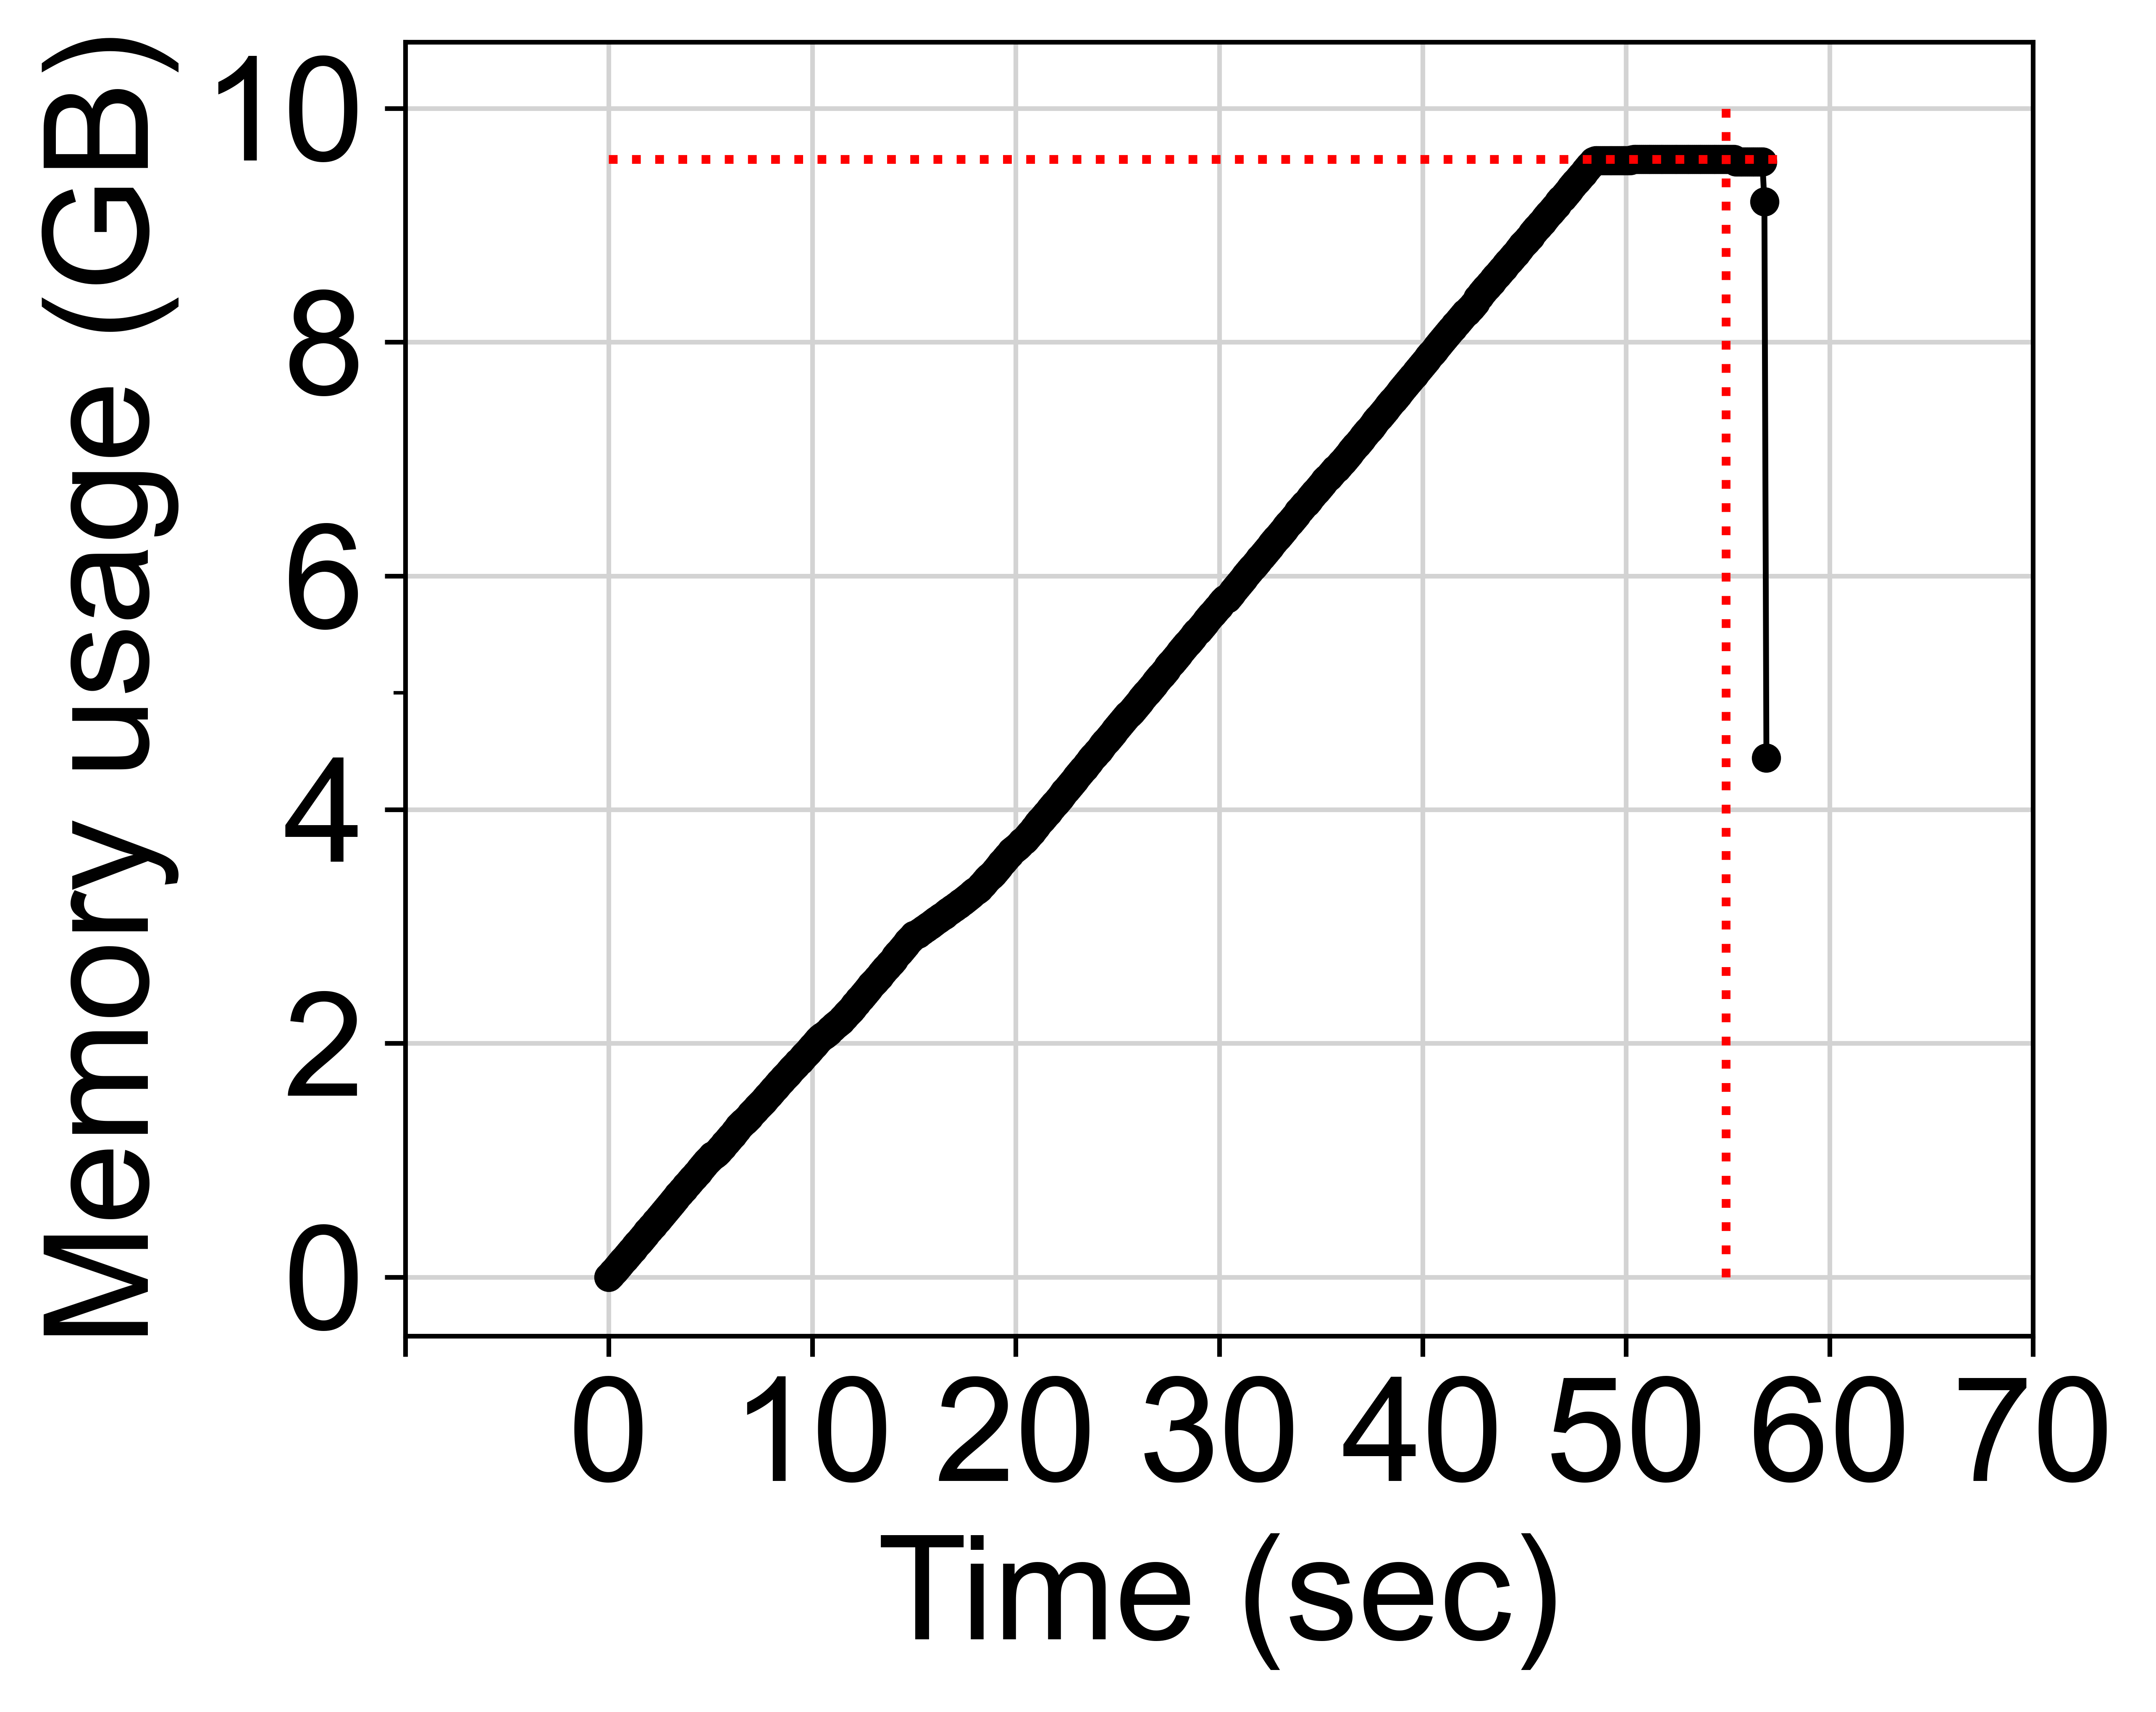

In [5]:
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
fig, ax1 = plt.subplots(figsize=(5, 4), dpi=1000)
plt.rcParams['lines.markersize'] = 4
plt.plot(hd_fail_data[1], lw=1, marker='o', markeredgecolor='black', color='black', label='Sample data')

max = 0
row = 0
for i in range(hd_fail_data.shape[0]):
    if hd_fail_data.iloc[i].at[1] > max:
        max = hd_fail_data.iloc[i].at[1]
        row = i
# 定义两个点的坐标
x1, y1 = row, 0
x2, y2 = row, hd_fail_data.iloc[row].at[1] + 0.5

# 绘制直线
plt.plot([x1, x2], [y1, y2], color='r', ls='dotted')

# 定义两个点的坐标
x1, y1 = 0, hd_fail_data.iloc[row].at[1]
x2, y2 = row + 30, hd_fail_data.iloc[row].at[1]

# 绘制直线
plt.plot([x1, x2], [y1, y2], color='r', ls='dotted')


# plt.legend(fontsize=25)

ax1.set_ylabel('Memory usage (GB)', fontsize=25)
ax1.set_xlabel('Time (sec)', fontsize=25)
# 获取当前的 x 轴刻度值列表
# plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
xticks = plt.xticks()[0]
print(xticks)
# 将每个刻度值除以 10
new_xticks = []
for i in xticks:
    if i < 0:
        new_xticks.append(None)
    else:
        new_xticks.append(int(i/10))

# 将新的刻度值设置为 x 轴刻度
ax1.set_xticks(xticks, new_xticks, fontsize=25)
plt.yticks(fontsize=25)
# ax1.set_ylim([0, 120])
minor_locator = MultipleLocator(5) # 小刻度线间隔为0.1
ax1.yaxis.set_minor_locator(minor_locator) # 设置小刻度线的位置
# ax1.ticklabel_format(axis='y', style='sci', scilimits=(3, 3), useMathText=True)

ax1.grid(axis="both", linestyle='-', zorder=0, color='lightgrey')
plt.savefig('./hd_fail.pdf', bbox_inches = 'tight')